In [ ]:
#a. Import time series in python

from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # Set global figure size and resolution for plots

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])  # Load the dataset and parse the 'date' column as datetime objects
df.head()  # Display the first few rows of the dataframe

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


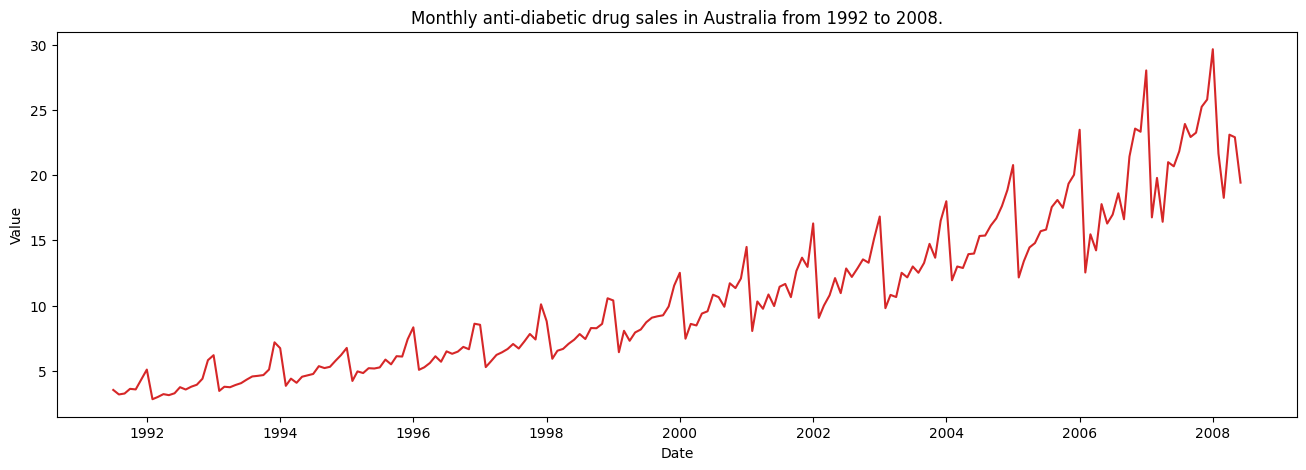

In [ ]:
#b.Visualizing time series

import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load data, parse 'date' as datetime, and set it as the index

# Define a function to plot time series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)  # Set figure size and resolution
    plt.plot(x, y, color='tab:red')  # Plot the time series with a red line
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)  # Set plot title and axis labels
    plt.show()  # Display the plot

# Call the function to plot the data
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

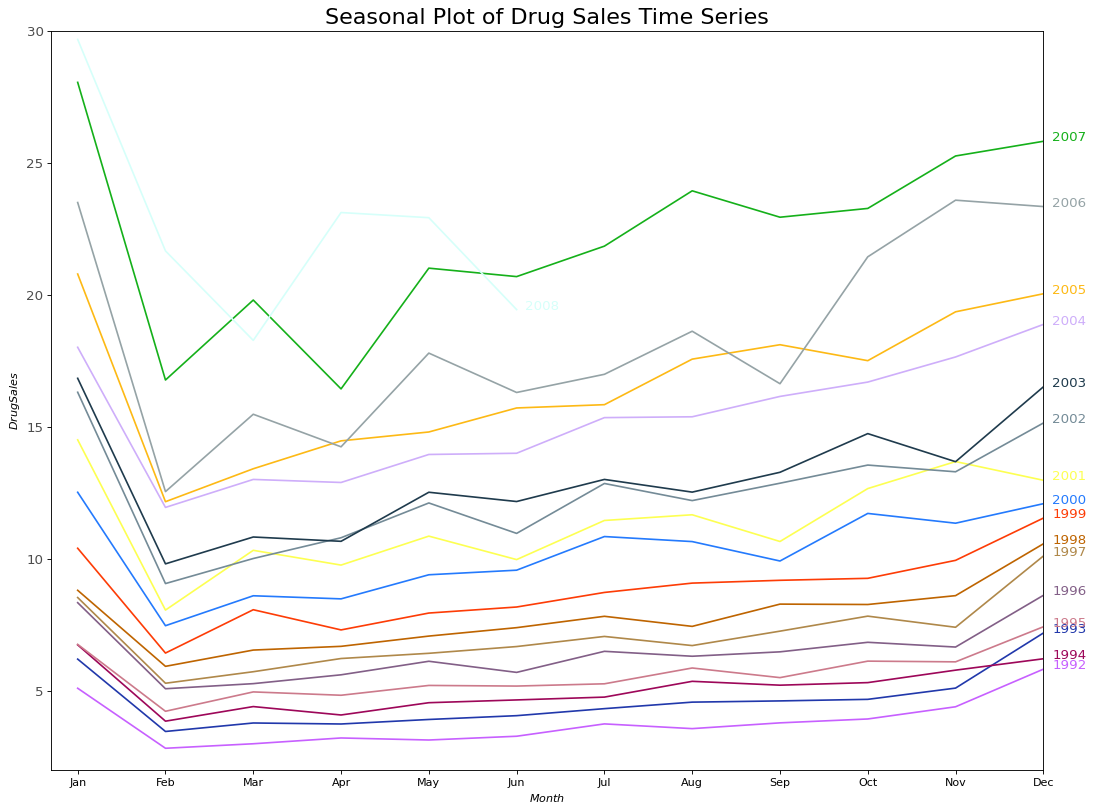

In [ ]:
#c. Seasonal plot on time series
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load data and parse 'date' as datetime
df.reset_index(inplace=True)  # Reset the index to make 'date' a column again

# Prepare data
df['year'] = [d.year for d in df.date]  # Extract year from 'date'
df['month'] = [d.strftime('%b') for d in df.date]  # Extract month name abbreviation from 'date'
years = df['year'].unique()  # Get unique years in the dataset

# Prep Colors
np.random.seed(100)  # Set seed for reproducibility
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)  # Randomly select colors for each year

# Draw Plot
plt.figure(figsize=(16,12), dpi=80)  # Set figure size and resolution
for i, y in enumerate(years):  # Loop through each year
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)  # Plot monthly data for each year
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])  # Annotate the year

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')  # Set plot limits and labels
plt.yticks(fontsize=12, alpha=.7)  # Customize y-axis ticks
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)  # Add title
plt.show()  # Display the plot


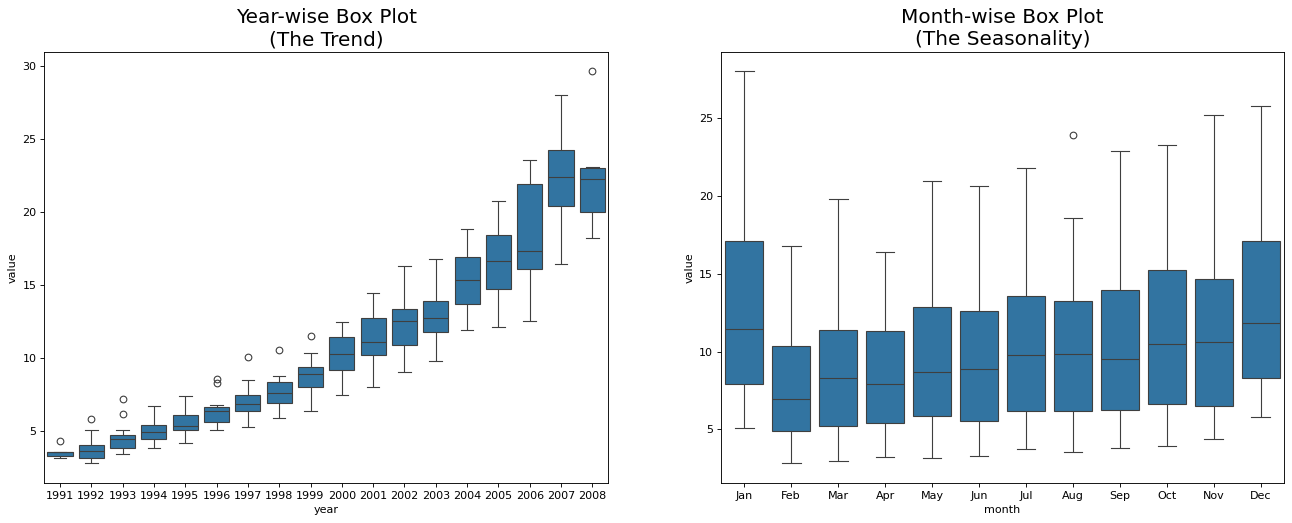

In [ ]:
#d. Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load data and parse 'date'
df.reset_index(inplace=True)  # Reset the index

# Prepare data
df['year'] = [d.year for d in df.date]  # Extract year
df['month'] = [d.strftime('%b') for d in df.date]  # Extract month name abbreviation
years = df['year'].unique()  # Get unique years

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=80)  # Create two subplots side by side
sns.boxplot(x='year', y='value', data=df, ax=axes[0])  # Boxplot for year-wise trends
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])  # Boxplot for month-wise seasonality excluding specific years

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)  # Title for the first plot
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)  # Title for the second plot
plt.show()  # Display the plots


<Axes: title={'center': 'Trend and Seasonality'}, xlabel='date'>

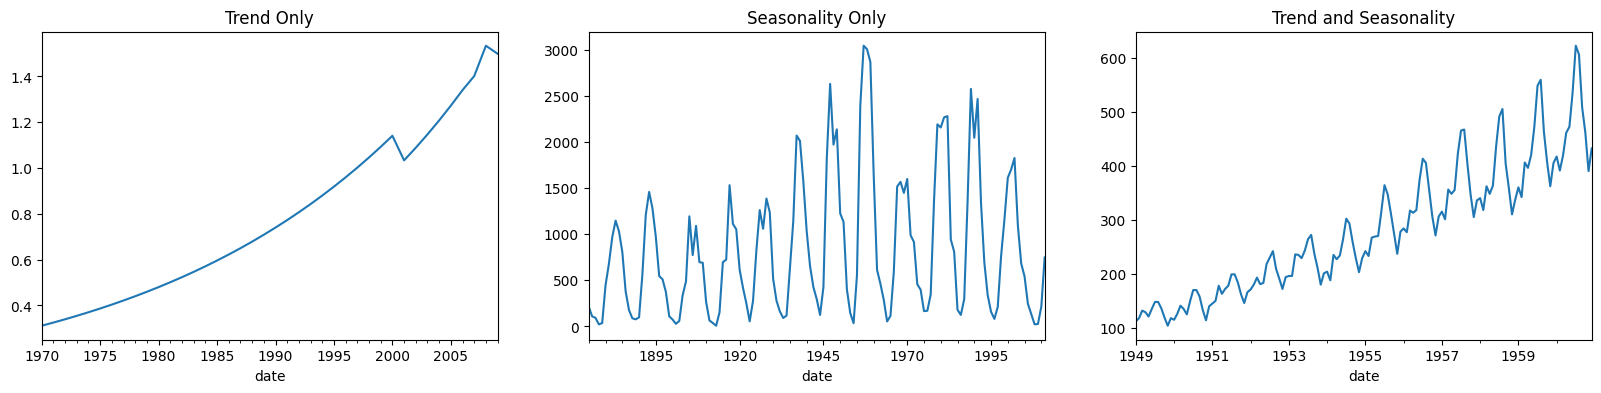

In [ ]:
#e. Patterns in time series
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)  # Create three subplots side by side

# Load and plot datasets with different characteristics
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])  # Trend-only data

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])  # Seasonality-only data

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])  # Both trend and seasonality

In [ ]:
#f. Perform additive and multiplicative time series
# Additive time series:
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Time Series:
# Value = Base Level x Trend x Seasonality x Error

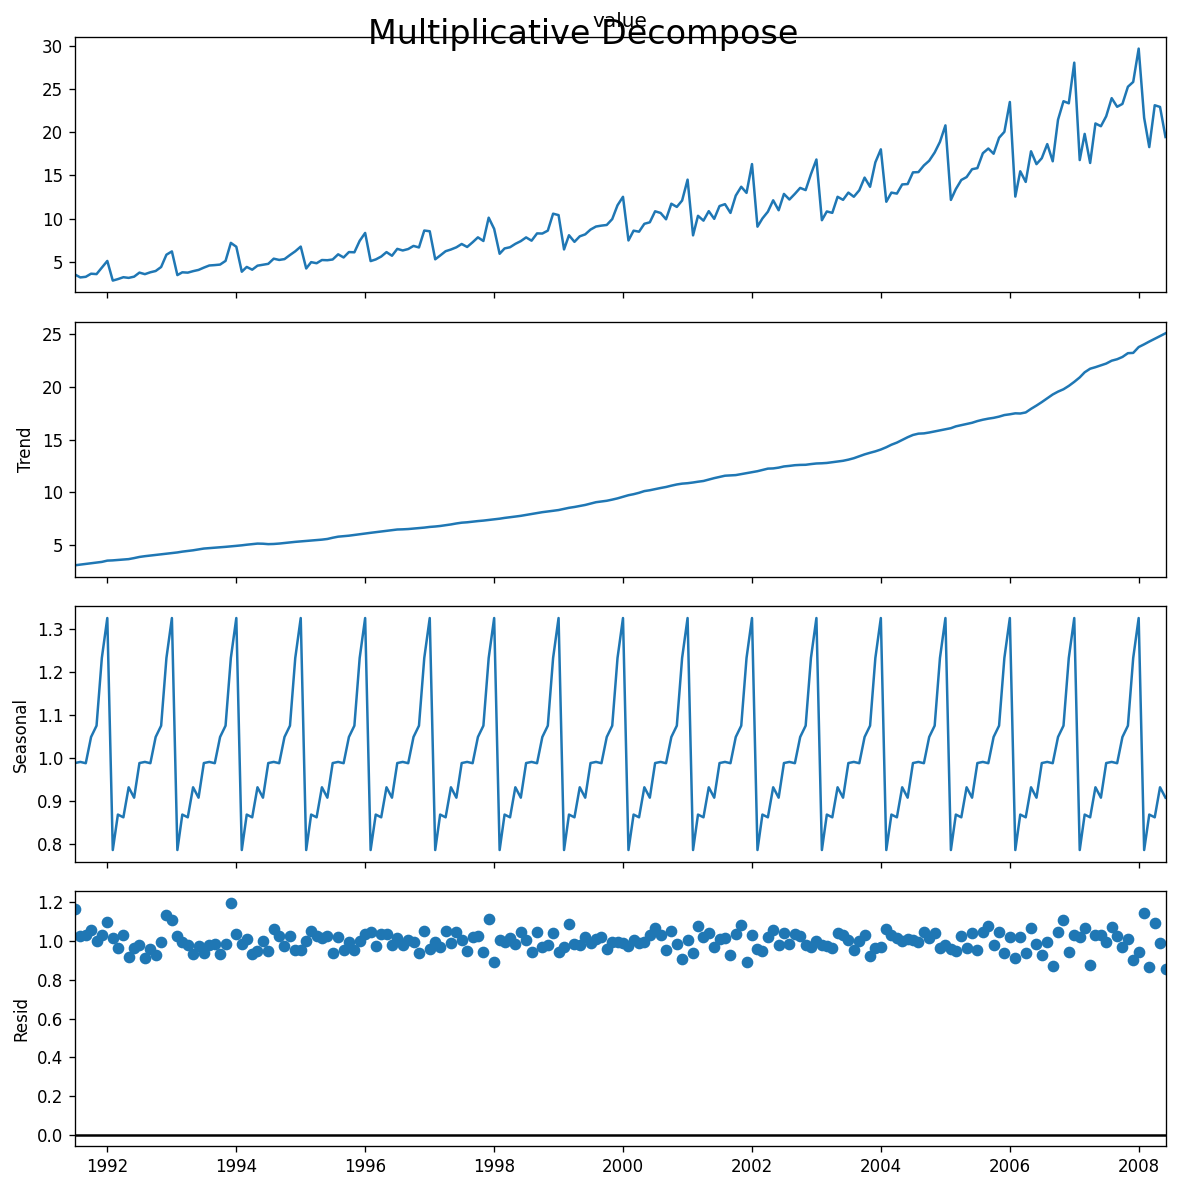

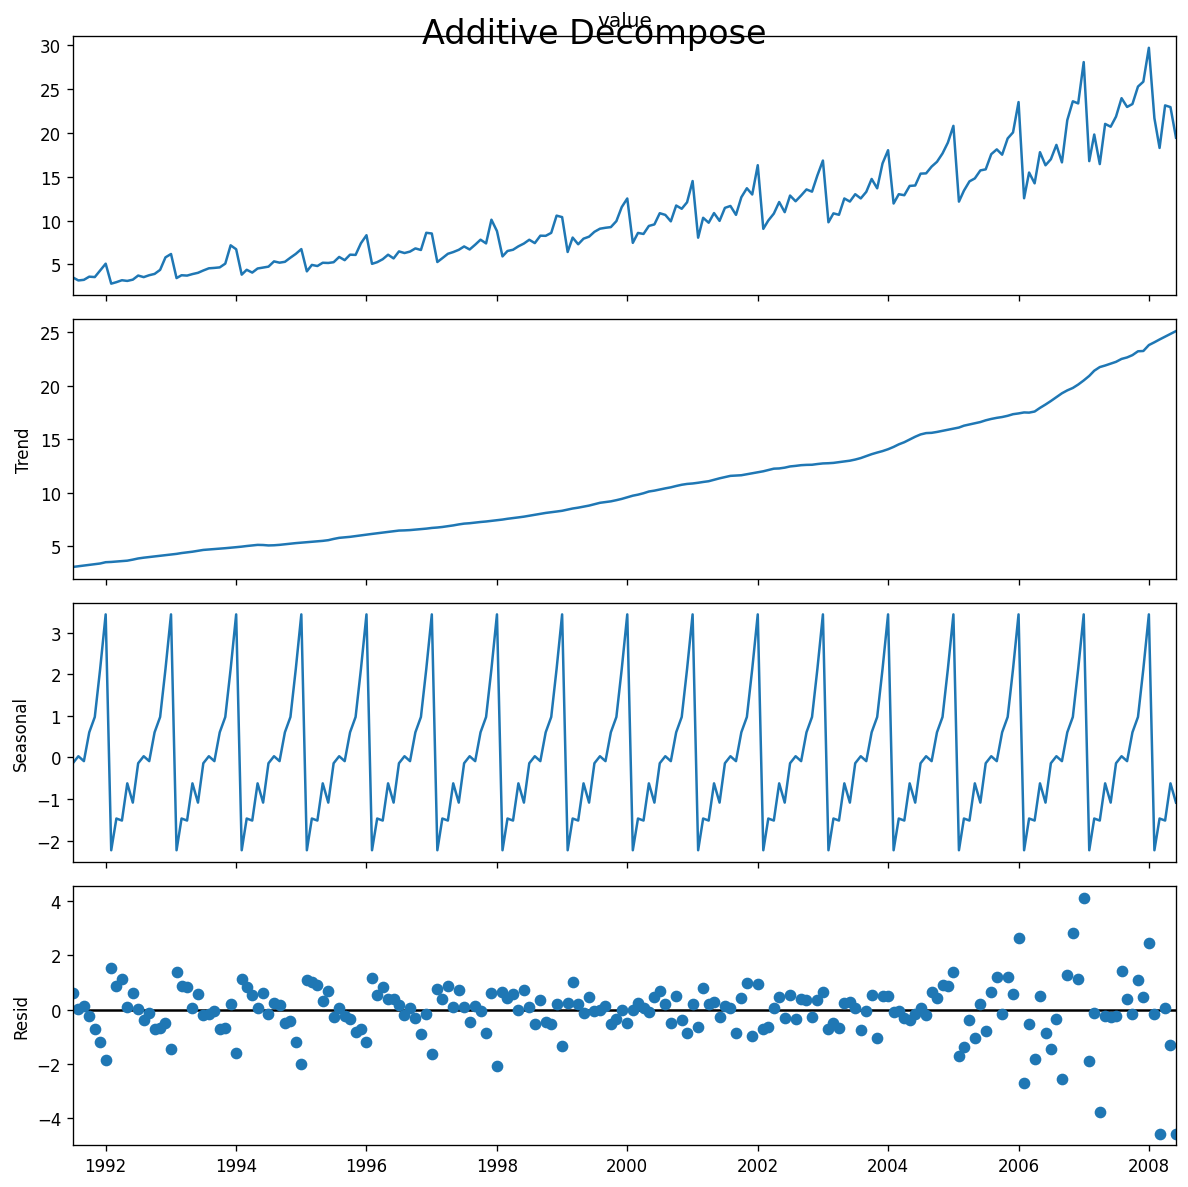

In [ ]:
#g. Decompose a time series into its components
from statsmodels.tsa.seasonal import seasonal_decompose  # Import function for decomposing time series
from dateutil.parser import parse  # Import parser for handling date parsing

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load data and parse 'date'

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')  # Perform multiplicative decomposition

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')  # Perform additive decomposition

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})  # Set figure size
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)  # Plot multiplicative decomposition
result_add.plot().suptitle('Additive Decompose', fontsize=20)  # Plot additive decomposition
plt.show()  # Display the plots


In [ ]:
#h. Identify whether the time series is stationary or non- stationary

from statsmodels.tsa.stattools import adfuller  # Import the Augmented Dickey-Fuller (ADF) test for checking stationarity

# Perform ADF Test
adf_test = adfuller(df['value'])  # Apply the ADF test on the time series data ('value' column)
print("ADF Statistic:", adf_test[0])  # Print the test statistic from the ADF test
print("p-value:", adf_test[1])  # Print the p-value from the ADF test
for key, value in adf_test[4].items():  # Loop through the critical values for different confidence levels
    print(f'Critical Value ({key}): {value}')  # Print the critical values for stationarity comparison

# Interpretation
if adf_test[1] <= 0.05:  # Check if the p-value is less than or equal to 0.05
    print("The time series is stationary.")  # If true, the series is stationary
else:
    print("The time series is non-stationary.")  # If false, the series is non-stationary


ADF Statistic: 3.1451856893067376
p-value: 1.0
Critical Value (1%): -3.465620397124192
Critical Value (5%): -2.8770397560752436
Critical Value (10%): -2.5750324547306476
The time series is non-stationary.


In [ ]:
#i. Make a non-stationary series stationary
# Second-order differencing
df['value_diff2'] = df['value_diff'] - df['value_diff'].shift(1)  # Compute second-order differencing by subtracting the first-order differences lagged by 1. This helps remove remaining trends or autocorrelations in the data.

# Drop NaN values created by differencing
df_diff2 = df['value_diff2'].dropna()  # Remove NaN values introduced by the differencing operation (at the start of the series).

# Recheck Stationarity
adf_test_diff2 = adfuller(df_diff2)  # Perform the Augmented Dickey-Fuller test on the second-order differenced series to check for stationarity.

print("ADF Statistic (Second Differenced):", adf_test_diff2[0])  # Print the ADF test statistic for the second-order differenced series.
print("p-value (Second Differenced):", adf_test_diff2[1])  # Print the p-value for the second-order differenced series to assess stationarity.

# Interpretation of ADF Test Results
if adf_test_diff2[1] <= 0.05:  # Check if the p-value is less than or equal to the significance level (0.05).
    print("The second differenced time series is stationary.")  # If the condition is true, the series is stationary.
else:
    print("The second differenced time series is still non-stationary.")  # If the condition is false, the series remains non-stationary.



ADF Statistic (Second Differenced): -10.292304706517406
p-value (Second Differenced): 3.5439163585276325e-18
The second differenced time series is stationary.


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

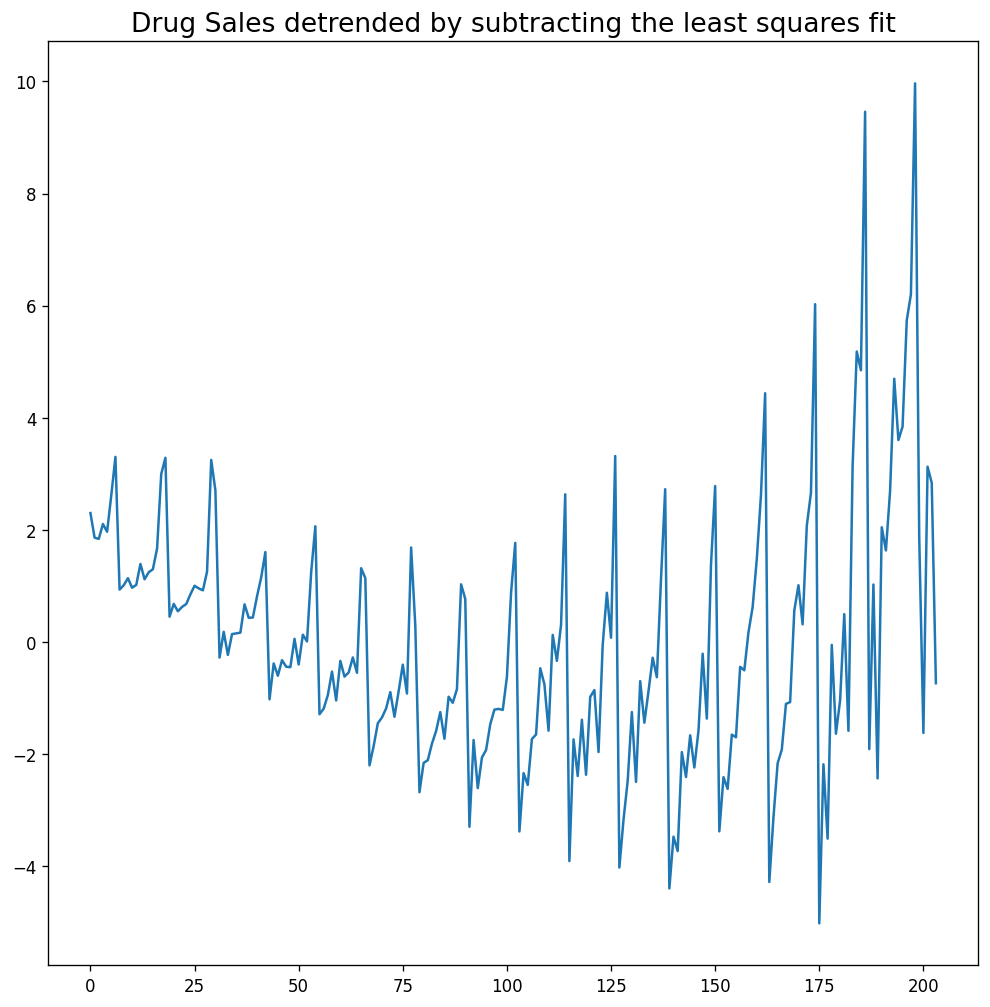

In [ ]:
# j. Detrend a time series
# Using scipy: Subtract the line of best fit
from scipy import signal  # Import the signal module from SciPy for signal processing tasks
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])  # Load the dataset and parse dates into datetime format
detrended = signal.detrend(df.value.values)  # Remove the trend by subtracting the least squares fit line from the data
plt.plot(detrended)  # Plot the detrended data
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)  # Set the plot title


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

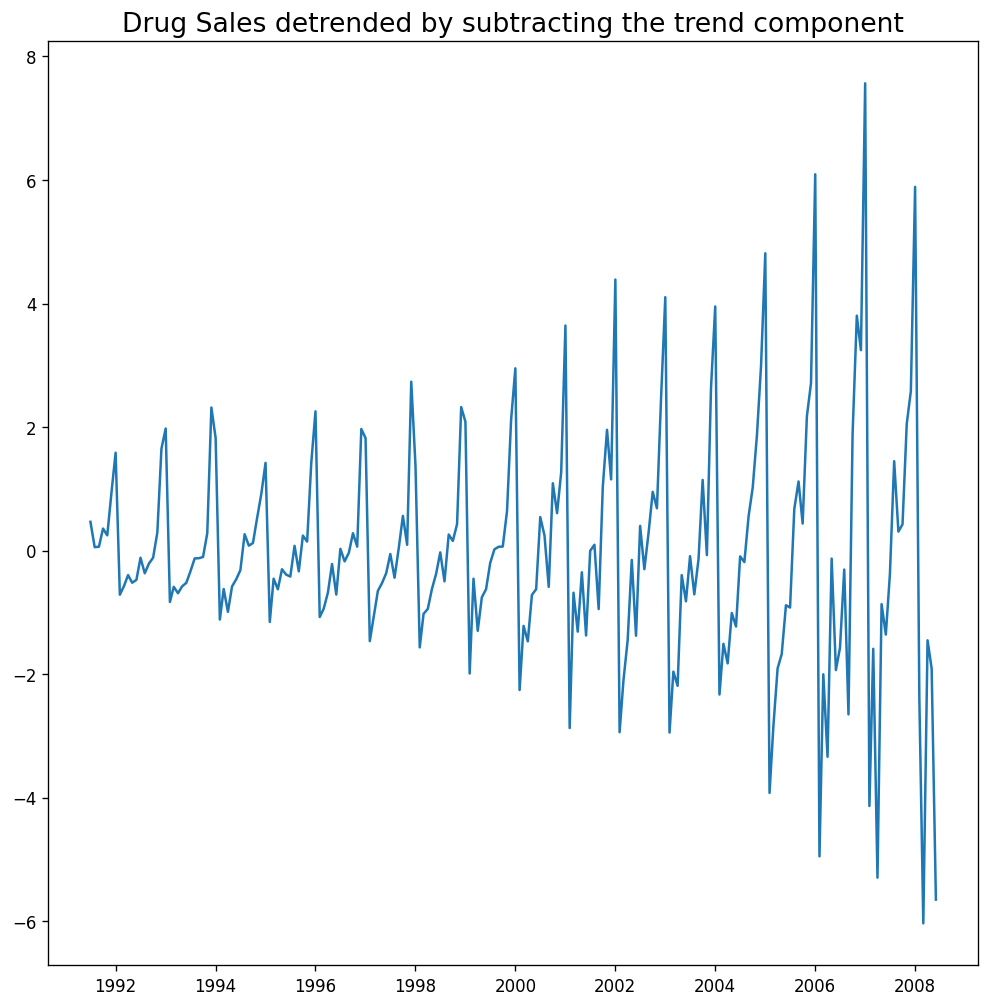

In [ ]:

# Using statsmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose  # Import seasonal decomposition method
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load dataset, parse dates, and set date as index
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')  # Perform multiplicative decomposition to extract trend and seasonal components
detrended = df.value.values - result_mul.trend  # Remove the trend component by subtracting it from the original data
plt.plot(detrended)  # Plot the detrended data
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)  # Set the plot title


[]

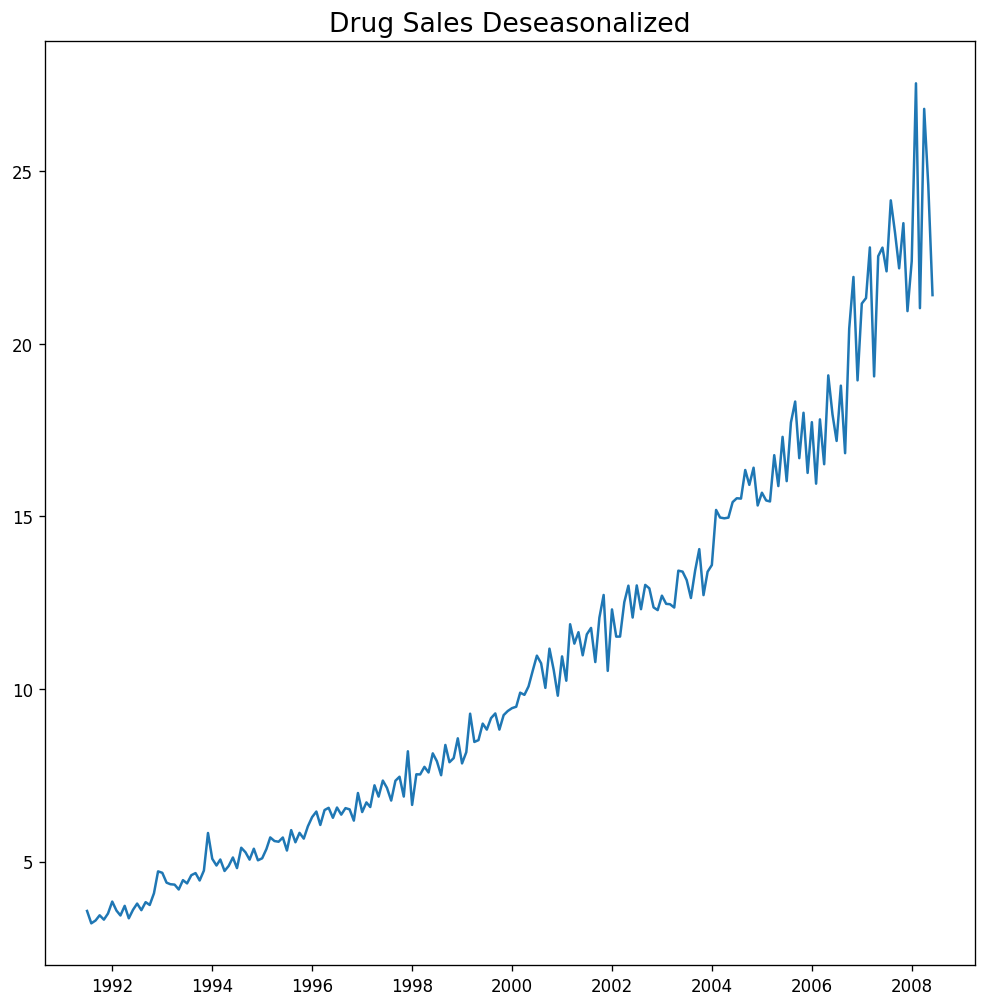

In [ ]:
# k. Deseasonalize a time series
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')  # Load dataset, parse dates, and set date as index

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')  # Perform multiplicative decomposition to extract components

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal  # Remove the seasonal component by dividing the original data by the seasonal component

# Plot
plt.plot(deseasonalized)  # Plot the deseasonalized data
plt.title('Drug Sales Deseasonalized', fontsize=16)  # Set the plot title
plt.plot()  # Display the plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

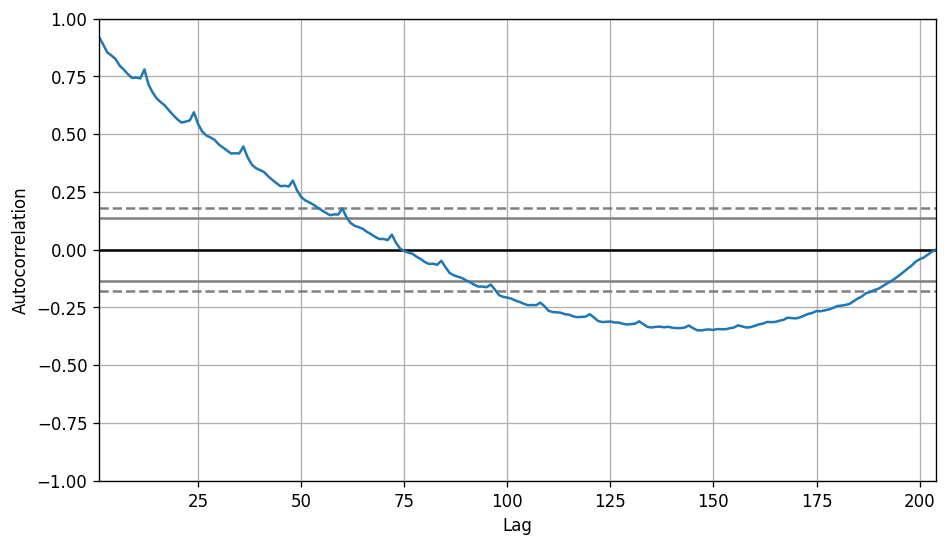

In [ ]:
# l. test for seasonality of a time series
from pandas.plotting import autocorrelation_plot  # Import autocorrelation plot from pandas plotting utilities
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')  # Load the dataset

# Draw Plot
plt.rcParams.update({'figure.figsize': (9, 5), 'figure.dpi': 120})  # Update figure size and resolution settings
autocorrelation_plot(df.value.tolist())  # Generate and plot the autocorrelation of the time series data